In [1]:
# default_exp core

# fastrl

> A Concise introduction to key ideas in RL.

In [2]:
#hide
from nbdev.showdoc import *

In [3]:
#hide
from fastrl.core import *

## Introduction

Let's start with humans learning from experiance.Say we are trying to learn to bicycle. We are driven by a goal to `stay balanced and pedal`.Along the way we fall.Now we need to start again.Somewhere in the gap between each iteration,we are learning and improving.Let's hash out the features of this process,if we are to model this :

1. **Past actions influence future output**: There is no immediate feedback.Each micro-action(exerting more pressure on the pedal,..) along the way either leads to falling-off balance or keep moving.


 `Computational Problem` : How to assign credit to actions when they are not temporally connected ?
 
 

2. **Outcomes might not be deterministic**: There are features of the environment(road,weather etc) that we do not fully understand that can effect outcome of the action.

`Computational Problem`: How to make inference about the properties of a system under uncertainity ?



Since out of the above two the latter seems to be simpler,let's  start by building our intuition about Non-deterministic systems :
Let's say we are given a Non-deterministic system whose properties we are unaware of.How can we build our knowledge about the properties of this system ?Can we come up with a systematic way(algorithm) to estimate it's behaviour ?

In [4]:
#hide
import matplotlib.pyplot as plt
import torch
def query(): return torch.randn(1).item()*10



In [5]:
query(),query(),query() #Fires different measurements each time.

(7.4098241329193115, 0.5061513558030128, -6.351804733276367)


Now let's measure a **property** of this system...say it's **mean**:


1. How will your estimate of this mean change with each query ? 


2. How does your confidence on this mean change with increasing number of queries $n$ ?

In [6]:
def estimate_mean(n):
    """Returns list of estimated means after each query repeated for n times."""
    list_n = [] # keep track of all the outputs from our slot machine
    list_mean = [] # collect the means after every sample.
    for i in range(n):
        out = query()
        list_n.append(out)
        list_mean.append(sum(list_n)/len(list_n))
    return list_mean   

In [7]:
estimate_mean(10) # The list of estimates for n = 1...10

[-3.6879709362983704,
 6.314430087804794,
 2.469513714313507,
 3.6626791208982468,
 4.9673797488212585,
 0.7197671631971995,
 -1.0968147431101118,
 1.3386080786585808,
 1.4323793351650238,
 0.6985524743795395]

(array([12., 75.,  6.,  2.,  0.,  1.,  0.,  2.,  0.,  2.]),
 array([-1.79274052, -0.24139413,  1.30995226,  2.86129865,  4.41264504,
         5.96399143,  7.51533782,  9.06668422, 10.61803061, 12.169377  ,
        13.72072339]),
 <a list of 10 Patch objects>)

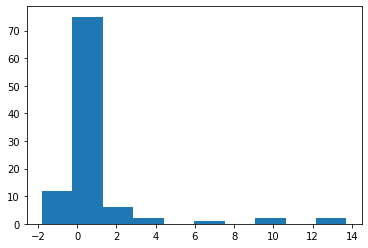

In [8]:
#let's plot these means
list_means = estimate_mean(100)
plt.hist(list_means)

We can see that the calculated mean vary a lot but seem to be closer to $0$ most often..But how does our estimate itself depend on $n$(number of queries) ?

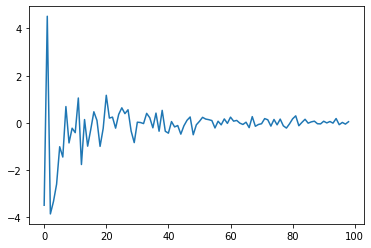

In [9]:
#let's measure the stability of our estimates by taking the difference of each successive estimates.

diff_means = [list_means[i]-list_means[i-1] for i in range(1,len(list_means))]
plt.plot(diff_means)


Our estimate of the mean don't seem to change much after a while.This is interesting.This aligns with our intuition - with more samples, we can be more confident.We can even go about proclaiming that whatever the dynamics of the system it's mean might be constant ?